In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [2]:
## Load the DataSet


df= pd.read_csv("Copy of bankruptcy-prevention.csv",sep=';')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
### Clean the column Names

df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [4]:
### Preview DataSet


print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0             1.0  bankruptcy  
3              0.0             1.0  bankruptcy  
4              0.0             1.0  bankruptcy  


In [5]:
print("\n🔹 Column Names:")
print(df.columns.tolist())


🔹 Column Names:
['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


In [6]:
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None


In [7]:
print("\n🔹 Dataset Description:")
print(df.describe())


🔹 Dataset Description:
       industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       250.000000      250.000000  
mean          0.476000        0.570000  
std           0.440682        0.434575  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.50

In [8]:
### Checking Missing Values


print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [9]:
### variable Distribution


print("\n🔹 Class Distribution:")
print(df['class'].value_counts(normalize=True))



🔹 Class Distribution:
non-bankruptcy    0.572
bankruptcy        0.428
Name: class, dtype: float64


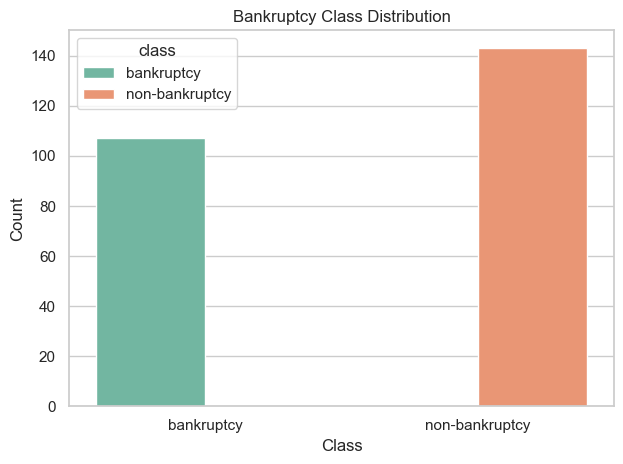

In [10]:
#### Plot target variable without future warning


sns.countplot(x='class', data=df, hue='class', palette='Set2')
plt.title('Bankruptcy Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
#### Feature Distribution


features = ['industrial_risk', 'management_risk', 'financial_flexibility', 
            'credibility', 'competitiveness', 'operating_risk']
features

['industrial_risk',
 'management_risk',
 'financial_flexibility',
 'credibility',
 'competitiveness',
 'operating_risk']

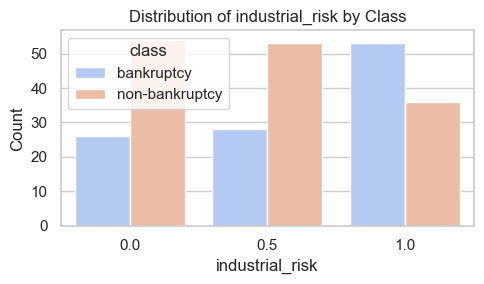

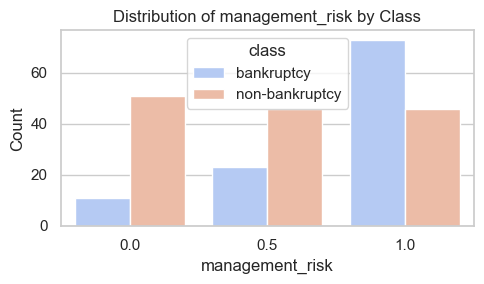

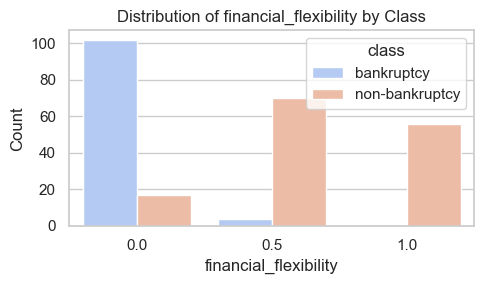

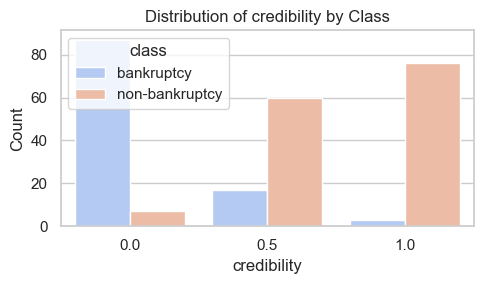

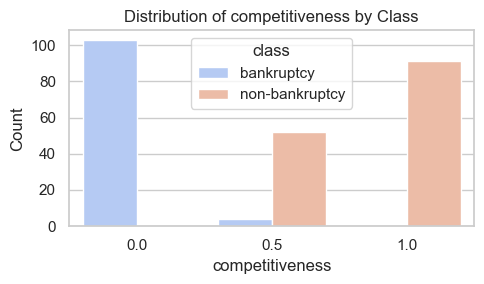

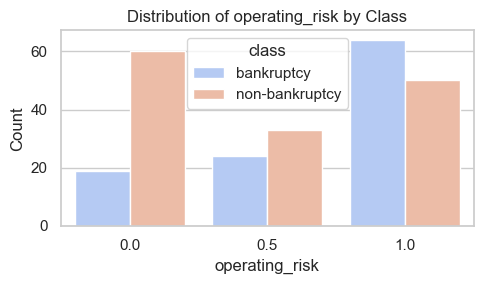

In [12]:
### Feature Distributions (with FutureWarning fix)
for col in features:
    plt.figure(figsize=(5, 3))
    
    sns.countplot(x=col, data=df, hue='class', palette='coolwarm')
    
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


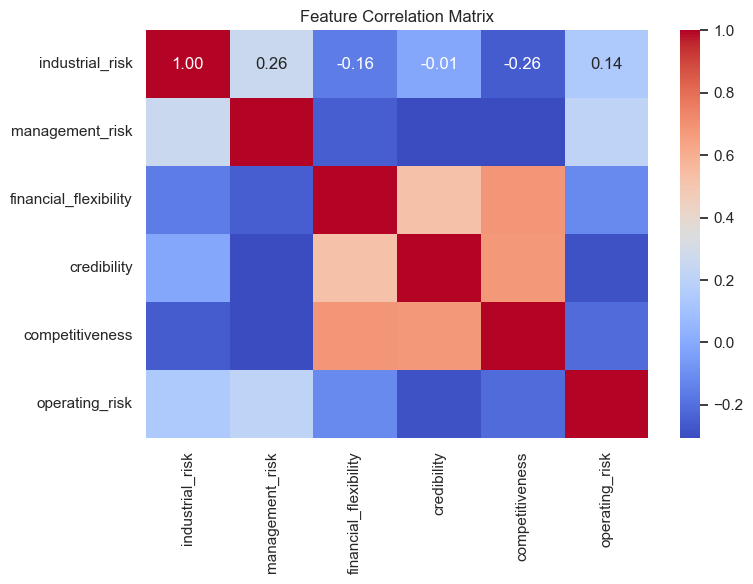

In [13]:
#####   Correlation Heatmap


plt.figure(figsize=(8, 6))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


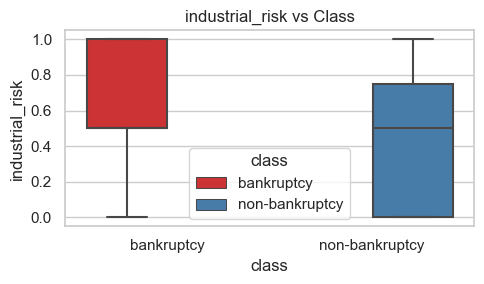

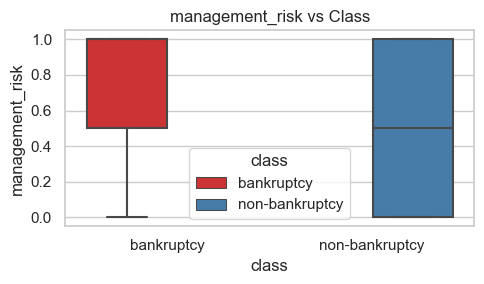

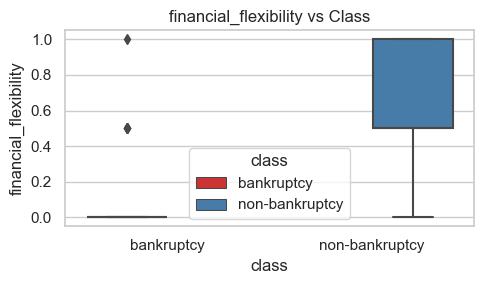

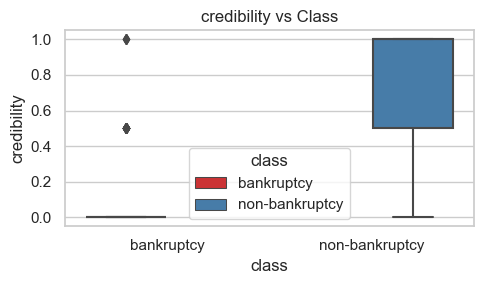

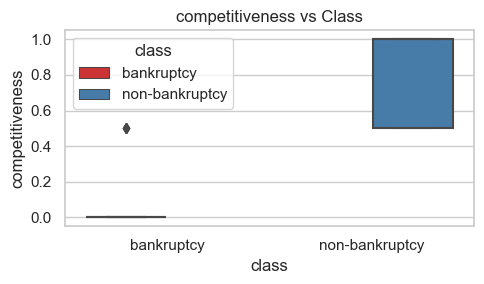

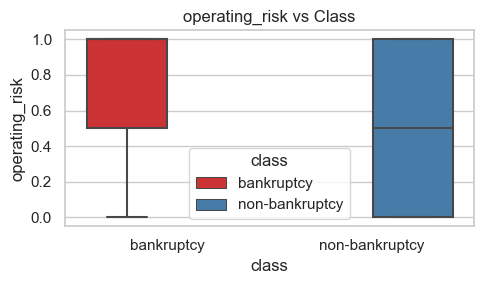

In [14]:
## Feature vs Target Analysis (with FutureWarning fix)
for col in features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='class', y=col, data=df, hue='class', palette='Set1')
    plt.title(f'{col} vs Class')
    plt.tight_layout()
    plt.show()

In [15]:
#########  Model Building  &  Model Evaluation  ############

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



# ✅ Load CSV using correct delimiter
df = pd.read_csv("Copy of bankruptcy-prevention.csv", delimiter=';')

# ✅ Strip spaces from column names
df.columns = [col.strip() for col in df.columns]

# ✅ Confirm column names
print("Cleaned Columns:", df.columns.tolist())

# ✅ Use the correct target and features
X = df.drop('class', axis=1)
y = df['class']

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Cleaned Columns: ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']

Training set size: (175, 6)
Test set size: (75, 6)


In [17]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)


Feature Importances:
competitiveness          0.501340
credibility              0.236721
financial_flexibility    0.192287
management_risk          0.028724
operating_risk           0.023255
industrial_risk          0.017673
dtype: float64


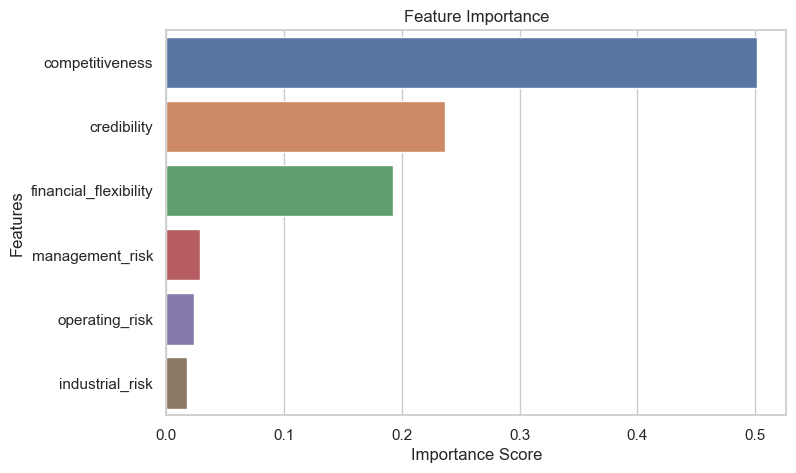

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [21]:
print("\nConfusion Matrix:")           ########## confusion Matrix ##########
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[25  0]
 [ 0 50]]


In [22]:
print("\nClassification Report:")   ########### Classification Report #########
print(classification_report(y_test, y_pred))


Classification Report:
                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        25
non-bankruptcy       1.00      1.00      1.00        50

      accuracy                           1.00        75
     macro avg       1.00      1.00      1.00        75
  weighted avg       1.00      1.00      1.00        75



In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


In [24]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

AUC Score: 1.0000


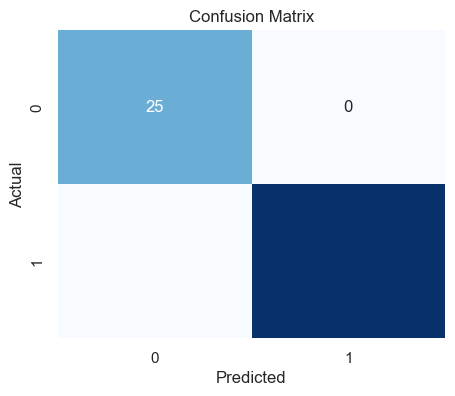

In [25]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

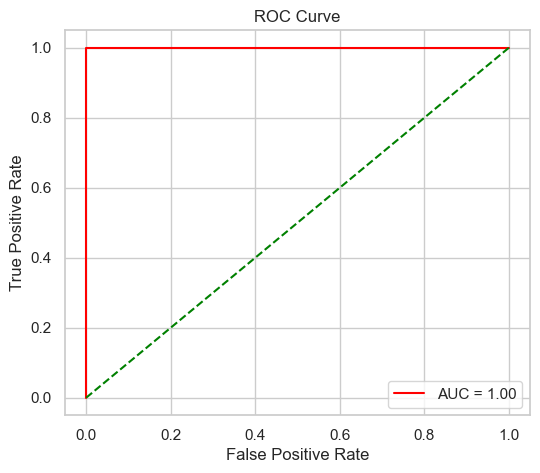

In [26]:

from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)  # Now: 'bankruptcy' => 1, 'non-bankruptcy' => 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='Red')
plt.plot([0, 1], [0, 1], linestyle='--', color='Green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()